## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  54.410956  1087.160536  0.450810  1.521556  1.578615
1  83.228487  1455.239229  0.672027  5.959438  1.412755
2  58.752734  1159.821710  0.648010  3.685105  1.435119
3  20.884794   640.723516  0.049272  2.505159  1.063633
4  53.794420   745.595582  0.094268  4.603345  1.085613


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 1.0694460	total: 64.4ms	remaining: 1m 4s
1:	learn: 1.0602110	total: 65.1ms	remaining: 32.5s
2:	learn: 1.0487926	total: 65.5ms	remaining: 21.8s
3:	learn: 1.0394949	total: 65.9ms	remaining: 16.4s
4:	learn: 1.0265384	total: 66.4ms	remaining: 13.2s
5:	learn: 1.0175329	total: 66.7ms	remaining: 11.1s
6:	learn: 1.0061992	total: 68.3ms	remaining: 9.69s
7:	learn: 0.9957216	total: 69.4ms	remaining: 8.61s
8:	learn: 0.9854678	total: 69.9ms	remaining: 7.7s
9:	learn: 0.9741587	total: 70.6ms	remaining: 6.99s
10:	learn: 0.9649545	total: 71.3ms	remaining: 6.41s
11:	learn: 0.9538629	total: 71.8ms	remaining: 5.92s
12:	learn: 0.9456438	total: 72.6ms	remaining: 5.51s
13:	learn: 0.9348933	total: 73.3ms	remaining: 5.16s
14:	learn: 0.9246363	total: 74ms	remaining: 4.86s
15:	learn: 0.9162505	total: 74.6ms	remaining: 4.59s
16:	learn: 0.9045157	total: 75ms	remaining: 4.33s
17:	learn: 0.8972954	total: 75.4ms	remaining: 4.12s
18:	learn: 0.8893969	total: 76ms	remaining: 3.92s
19:	learn: 0.8797737	total: 7

153:	learn: 0.3380247	total: 146ms	remaining: 801ms
154:	learn: 0.3357597	total: 146ms	remaining: 798ms
155:	learn: 0.3337656	total: 147ms	remaining: 795ms
156:	learn: 0.3320975	total: 147ms	remaining: 792ms
157:	learn: 0.3303569	total: 148ms	remaining: 788ms
158:	learn: 0.3290434	total: 148ms	remaining: 784ms
159:	learn: 0.3270330	total: 149ms	remaining: 781ms
160:	learn: 0.3252577	total: 149ms	remaining: 779ms
161:	learn: 0.3238772	total: 150ms	remaining: 775ms
162:	learn: 0.3222911	total: 150ms	remaining: 772ms
163:	learn: 0.3200794	total: 151ms	remaining: 769ms
164:	learn: 0.3181467	total: 152ms	remaining: 767ms
165:	learn: 0.3167230	total: 152ms	remaining: 764ms
166:	learn: 0.3152175	total: 153ms	remaining: 762ms
167:	learn: 0.3137904	total: 154ms	remaining: 761ms
168:	learn: 0.3118097	total: 154ms	remaining: 759ms
169:	learn: 0.3106344	total: 155ms	remaining: 757ms
170:	learn: 0.3089460	total: 156ms	remaining: 755ms
171:	learn: 0.3071792	total: 156ms	remaining: 752ms
172:	learn: 

234:	learn: 0.2354677	total: 194ms	remaining: 632ms
235:	learn: 0.2346115	total: 195ms	remaining: 631ms
236:	learn: 0.2337969	total: 195ms	remaining: 629ms
237:	learn: 0.2326010	total: 196ms	remaining: 628ms
238:	learn: 0.2313782	total: 197ms	remaining: 626ms
239:	learn: 0.2302928	total: 197ms	remaining: 624ms
240:	learn: 0.2296186	total: 198ms	remaining: 623ms
241:	learn: 0.2289358	total: 198ms	remaining: 621ms
242:	learn: 0.2283512	total: 199ms	remaining: 620ms
243:	learn: 0.2277869	total: 199ms	remaining: 618ms
244:	learn: 0.2271387	total: 200ms	remaining: 617ms
245:	learn: 0.2265621	total: 201ms	remaining: 615ms
246:	learn: 0.2251513	total: 201ms	remaining: 614ms
247:	learn: 0.2242325	total: 202ms	remaining: 612ms
248:	learn: 0.2234410	total: 202ms	remaining: 610ms
249:	learn: 0.2228359	total: 203ms	remaining: 609ms
250:	learn: 0.2222875	total: 203ms	remaining: 607ms
251:	learn: 0.2208808	total: 204ms	remaining: 606ms
252:	learn: 0.2204279	total: 205ms	remaining: 604ms
253:	learn: 

363:	learn: 0.1432234	total: 274ms	remaining: 478ms
364:	learn: 0.1426356	total: 274ms	remaining: 477ms
365:	learn: 0.1424184	total: 275ms	remaining: 476ms
366:	learn: 0.1420682	total: 276ms	remaining: 476ms
367:	learn: 0.1415570	total: 276ms	remaining: 474ms
368:	learn: 0.1413755	total: 277ms	remaining: 473ms
369:	learn: 0.1407119	total: 277ms	remaining: 472ms
370:	learn: 0.1405344	total: 278ms	remaining: 471ms
371:	learn: 0.1402041	total: 278ms	remaining: 470ms
372:	learn: 0.1396404	total: 279ms	remaining: 469ms
373:	learn: 0.1390717	total: 279ms	remaining: 467ms
374:	learn: 0.1384294	total: 280ms	remaining: 466ms
375:	learn: 0.1377175	total: 280ms	remaining: 465ms
376:	learn: 0.1369577	total: 281ms	remaining: 464ms
377:	learn: 0.1361948	total: 281ms	remaining: 463ms
378:	learn: 0.1360007	total: 282ms	remaining: 461ms
379:	learn: 0.1352700	total: 283ms	remaining: 461ms
380:	learn: 0.1345386	total: 283ms	remaining: 460ms
381:	learn: 0.1336955	total: 284ms	remaining: 459ms
382:	learn: 

461:	learn: 0.0989436	total: 331ms	remaining: 386ms
462:	learn: 0.0983656	total: 332ms	remaining: 385ms
463:	learn: 0.0978860	total: 333ms	remaining: 385ms
464:	learn: 0.0972996	total: 333ms	remaining: 384ms
465:	learn: 0.0967394	total: 334ms	remaining: 383ms
466:	learn: 0.0965903	total: 334ms	remaining: 382ms
467:	learn: 0.0961953	total: 335ms	remaining: 381ms
468:	learn: 0.0958865	total: 335ms	remaining: 379ms
469:	learn: 0.0956902	total: 336ms	remaining: 379ms
470:	learn: 0.0954958	total: 336ms	remaining: 378ms
471:	learn: 0.0950664	total: 337ms	remaining: 377ms
472:	learn: 0.0946131	total: 337ms	remaining: 376ms
473:	learn: 0.0940690	total: 338ms	remaining: 375ms
474:	learn: 0.0938189	total: 338ms	remaining: 373ms
475:	learn: 0.0936604	total: 338ms	remaining: 373ms
476:	learn: 0.0931760	total: 339ms	remaining: 372ms
477:	learn: 0.0928021	total: 339ms	remaining: 371ms
478:	learn: 0.0924371	total: 340ms	remaining: 369ms
479:	learn: 0.0919643	total: 340ms	remaining: 368ms
480:	learn: 

650:	learn: 0.0551468	total: 425ms	remaining: 228ms
651:	learn: 0.0550408	total: 427ms	remaining: 228ms
652:	learn: 0.0548711	total: 427ms	remaining: 227ms
653:	learn: 0.0547055	total: 427ms	remaining: 226ms
654:	learn: 0.0545677	total: 428ms	remaining: 225ms
655:	learn: 0.0544058	total: 428ms	remaining: 225ms
656:	learn: 0.0542703	total: 429ms	remaining: 224ms
657:	learn: 0.0541371	total: 429ms	remaining: 223ms
658:	learn: 0.0539785	total: 430ms	remaining: 222ms
659:	learn: 0.0538475	total: 430ms	remaining: 222ms
660:	learn: 0.0537187	total: 431ms	remaining: 221ms
661:	learn: 0.0535633	total: 431ms	remaining: 220ms
662:	learn: 0.0534366	total: 432ms	remaining: 219ms
663:	learn: 0.0533319	total: 432ms	remaining: 219ms
664:	learn: 0.0531523	total: 433ms	remaining: 218ms
665:	learn: 0.0530983	total: 434ms	remaining: 218ms
666:	learn: 0.0529932	total: 434ms	remaining: 217ms
667:	learn: 0.0529405	total: 435ms	remaining: 216ms
668:	learn: 0.0528024	total: 435ms	remaining: 215ms
669:	learn: 

748:	learn: 0.0432115	total: 489ms	remaining: 164ms
749:	learn: 0.0430709	total: 492ms	remaining: 164ms
750:	learn: 0.0429238	total: 493ms	remaining: 163ms
751:	learn: 0.0427584	total: 494ms	remaining: 163ms
752:	learn: 0.0426307	total: 494ms	remaining: 162ms
753:	learn: 0.0425560	total: 495ms	remaining: 161ms
754:	learn: 0.0424318	total: 495ms	remaining: 161ms
755:	learn: 0.0423587	total: 496ms	remaining: 160ms
756:	learn: 0.0422866	total: 496ms	remaining: 159ms
757:	learn: 0.0421662	total: 497ms	remaining: 159ms
758:	learn: 0.0420283	total: 497ms	remaining: 158ms
759:	learn: 0.0419111	total: 497ms	remaining: 157ms
760:	learn: 0.0418419	total: 498ms	remaining: 156ms
761:	learn: 0.0417270	total: 498ms	remaining: 156ms
762:	learn: 0.0416593	total: 499ms	remaining: 155ms
763:	learn: 0.0415604	total: 499ms	remaining: 154ms
764:	learn: 0.0414941	total: 500ms	remaining: 154ms
765:	learn: 0.0414287	total: 500ms	remaining: 153ms
766:	learn: 0.0413192	total: 501ms	remaining: 152ms
767:	learn: 

789:	learn: 0.0385523	total: 519ms	remaining: 138ms
790:	learn: 0.0384049	total: 520ms	remaining: 137ms
791:	learn: 0.0383543	total: 520ms	remaining: 137ms
792:	learn: 0.0382796	total: 521ms	remaining: 136ms
793:	learn: 0.0381266	total: 521ms	remaining: 135ms
794:	learn: 0.0380790	total: 522ms	remaining: 135ms
795:	learn: 0.0379379	total: 522ms	remaining: 134ms
796:	learn: 0.0379067	total: 523ms	remaining: 133ms
797:	learn: 0.0377048	total: 523ms	remaining: 132ms
798:	learn: 0.0375587	total: 524ms	remaining: 132ms
799:	learn: 0.0375372	total: 524ms	remaining: 131ms
800:	learn: 0.0375161	total: 525ms	remaining: 130ms
801:	learn: 0.0373186	total: 526ms	remaining: 130ms
802:	learn: 0.0371838	total: 526ms	remaining: 129ms
803:	learn: 0.0371685	total: 526ms	remaining: 128ms
804:	learn: 0.0370578	total: 527ms	remaining: 128ms
805:	learn: 0.0368646	total: 527ms	remaining: 127ms
806:	learn: 0.0368337	total: 528ms	remaining: 126ms
807:	learn: 0.0366973	total: 529ms	remaining: 126ms
808:	learn: 

899:	learn: 0.0310987	total: 578ms	remaining: 64.2ms
900:	learn: 0.0310436	total: 578ms	remaining: 63.5ms
901:	learn: 0.0309301	total: 579ms	remaining: 62.9ms
902:	learn: 0.0308889	total: 579ms	remaining: 62.2ms
903:	learn: 0.0307505	total: 580ms	remaining: 61.6ms
904:	learn: 0.0306972	total: 580ms	remaining: 60.9ms
905:	learn: 0.0306609	total: 581ms	remaining: 60.3ms
906:	learn: 0.0306090	total: 581ms	remaining: 59.6ms
907:	learn: 0.0305427	total: 582ms	remaining: 58.9ms
908:	learn: 0.0304690	total: 582ms	remaining: 58.3ms
909:	learn: 0.0303907	total: 583ms	remaining: 57.6ms
910:	learn: 0.0303551	total: 583ms	remaining: 57ms
911:	learn: 0.0303201	total: 584ms	remaining: 56.3ms
912:	learn: 0.0302855	total: 584ms	remaining: 55.7ms
913:	learn: 0.0302515	total: 585ms	remaining: 55ms
914:	learn: 0.0301748	total: 585ms	remaining: 54.4ms
915:	learn: 0.0301411	total: 585ms	remaining: 53.7ms
916:	learn: 0.0301080	total: 586ms	remaining: 53ms
917:	learn: 0.0299785	total: 586ms	remaining: 52.4ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.32893812552491575


ABC Pre-generator MAE 1.3371749842900793


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

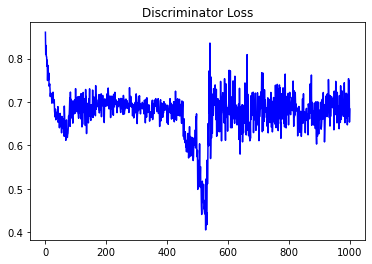

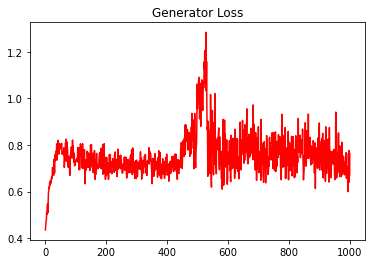

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.5544700966477394


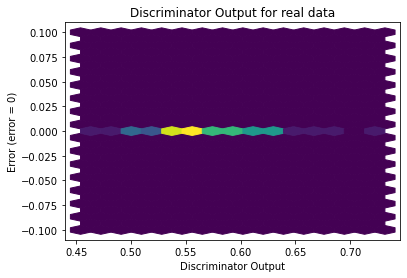

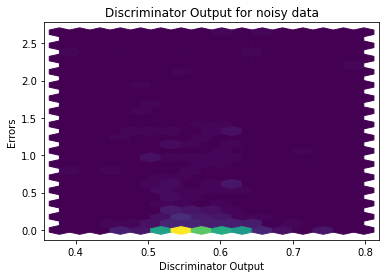

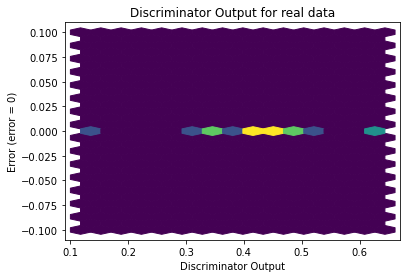

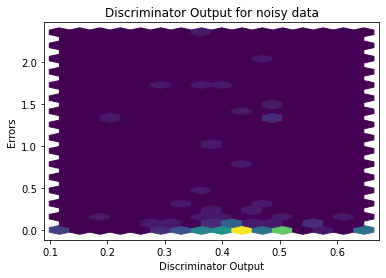

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

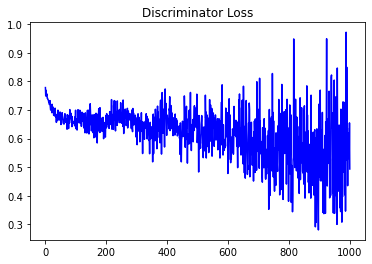

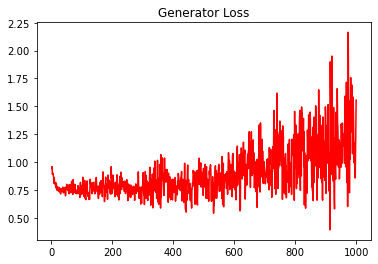

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
3.1030424539037047


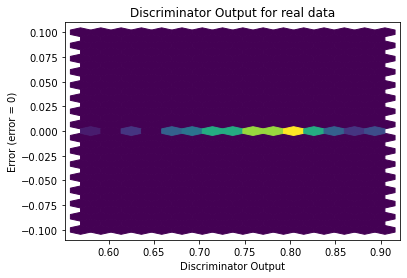

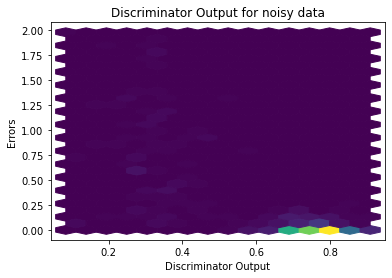

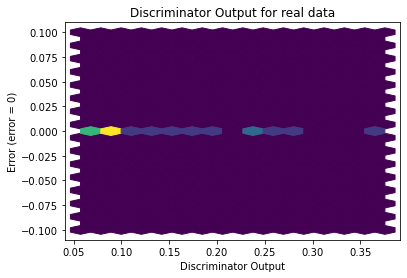

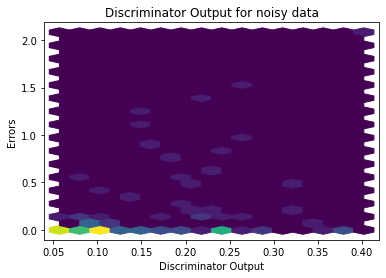

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


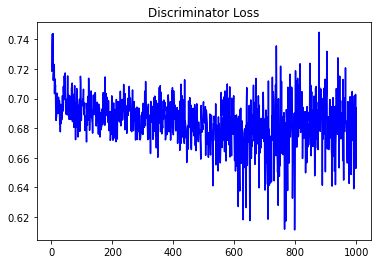

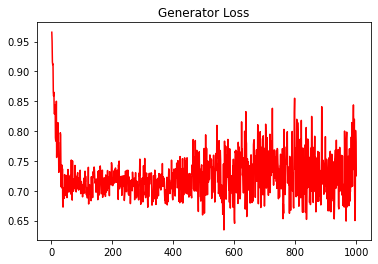

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.6911501002125442


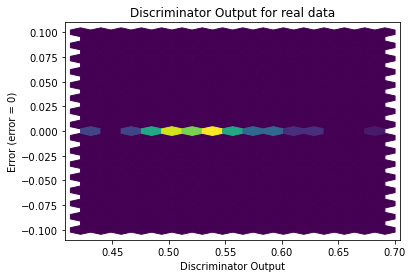

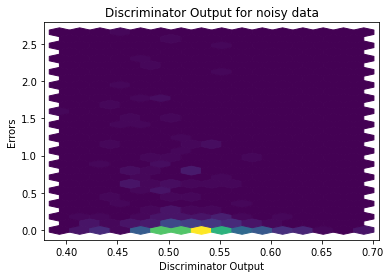

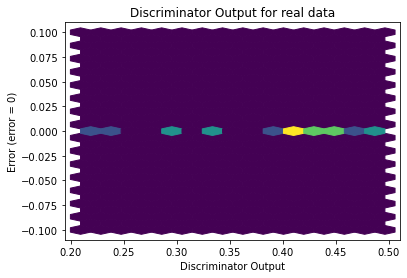

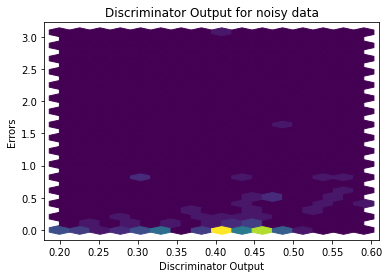

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


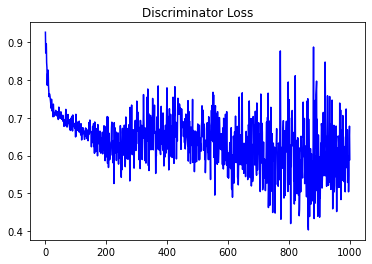

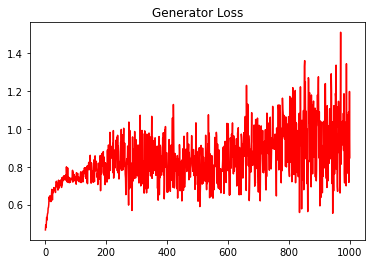

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
1.1993989326478913


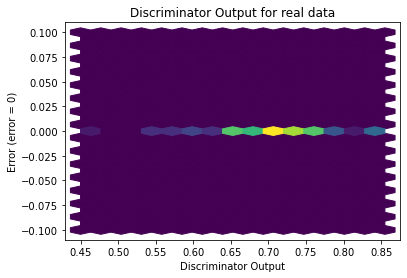

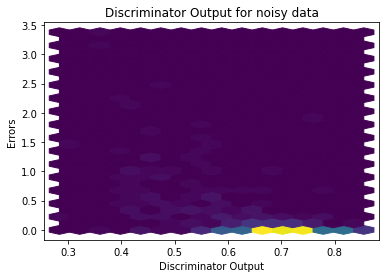

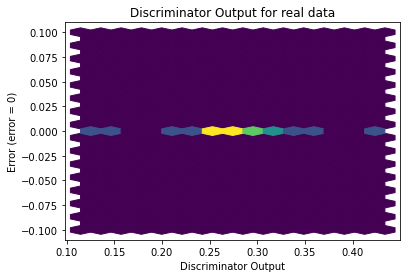

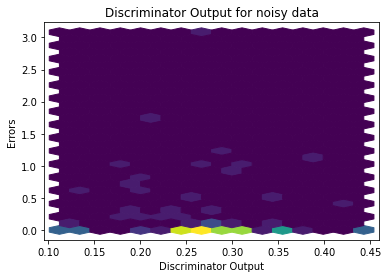

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5922]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5670]], requires_grad=True)
